<a href="https://colab.research.google.com/github/karlssoj/compvis/blob/Exempel3_Bildklassificering/X_Y_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Klassificeringsexempel med faltningsnätverk (CNN) implementerat med Keras och Tensorflow </h1>

I det här simplata exemplet tränar vi in en modell att kunna se skillnad mellan X och O. I katalogen X_O_training finns 2 kataloger O och X. Vardera katalog innehåller 4 träningsbilder på X respektive O. Sedan har vi en bild i samma katalog som denna notebookfil,"test_image.jpg" som vi använder för att testa om modellen gissar rätt. Observera att för att den här modellen ska fungera krävs det bilder där X och Y fyller hela bakrunden. För att modellen ska fungera med X och Y av olika storlekar placerade på olika ställen i bakgrunden krävs en bättre dataset.

Skriptet är testkört i google colab (men kan nog även köras lokalt). Om du kör på colab.

**Börjar med att kolna repon så att vi får med alla filer**

In [ ]:
!git clone -b Exempel3_Bildklassificering https://github.com/karlssoj/compvis.git

<b> 1. Importerar OpenCV och Matplotlib

*   List item
*   List item



In [2]:
import matplotlib.pyplot as plt
import cv2 as cv

<b> 2. Importerar ImageDataGenerator från Keras-biblioteket för att kunna hantera träningsbilderna i X_O_training/o och X_O_training/x

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<b> 3. Skapar ett ImageDataGenerator-objekt med vissa inställningar för hur de inlästa träningsbilderna ska "randomiseras"

In [4]:
image_gen = ImageDataGenerator(rotation_range=30,    #slumpmässiga roteringar av bilderna i grader
                             width_shift_range=0.1,  #slumpmässig skiftning i x-led (ett värde mellan 0 och 1)
                             height_shift_range=0.1, #slumpmässig skiftning i y-led (ett värde mellan 0 och 1)
                             rescale=1/255,          #skalar ner ett 8-bitars pixelvärde (0-255) till ett värde mellan 0 och 1
                             zoom_range=0.6,         #slumpmässig zoom
                             horizontal_flip=True)   #"flippar" bilden slumpmässigt i horisontalt läge

<b> 4. Läser in alla träningsbilder på X och O från respektive kataloger i X_O_training-katalogen. Alla bilder får storleken 100x100 pixlar

In [6]:
train_image_gen = image_gen.flow_from_directory('/content/compvis/X_O_training',
                                                target_size=(100,100))

Found 19 images belonging to 2 classes.


<b> 5. Träningsbilderna har automatiskt markerats enligt namnet på katalogerna de finns sparade i, dvs. O har labeln 0 och X har labeln 1

In [7]:
print(train_image_gen.class_indices)

{'O': 0, 'X': 1}


<b> 6. Importerar behövliga bibliotek från Keras för att kunna skapa en CNN-modell

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

<b> 7. Skapar ett faltningslager (convolutional layer) bestående av 32 olika filters. Som aktiveringsfunktion används ReLU (för att bli av med alla negativa pixelvärden<br><br>

<b> 8. Kör MaxPooling med 2x2 fönsterstorlek och hopp (stride) = 2<br><br>

<b> 9. Formaterar om alla filtrerade bilder (i detta fall 32 stycken) till en enda array = flatten<br><br>

<b> 10. Till slut mynnar allt ut i 2 neuroner i "fully connected layer", en för X och en för Y

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100,100,3), activation = 'relu')) #Faltningslager med 32 filter
model.add(MaxPooling2D(pool_size = (2, 2)))                                 #MaxPooling 2x2 fönsterstorlek och hopp (stride) = 2
model.add(Flatten())                                                        #Formaterar om alla filtrerade blder (32 stycken) till en array
model.add(Dense(units = 2, activation = "sigmoid"))                         #2 neuroner på slutet

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<b> 11. "Kompilerar" modellen. Optimizer är den metod man vill använda för att optimera alla vikter i nätet. Adam är en variant av gradient descent. Loss definierar "loss function", dvs. vad man vill använda för metod för att beräkna feluppskattningen under inträningen.

In [10]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 76832)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │         153,666 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,562 (603.76 KB)

 Trainable params: 154,562 (603.76 KB)

 Non-trainable params: 0 (0.00 B)

<b> 12. Startar själva inträningen på testdataset:en. Epochs definierar hur många ggr inlärningsalgoritmen kommer att gå igenom hela dataset:en.

In [12]:
results = model.fit(train_image_gen, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4737 - loss: 0.7147
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.5263 - loss: 6.5879
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5263 - loss: 2.0504
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5263 - loss: 2.9560
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.5263 - loss: 3.8793
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.5263 - loss: 2.7872
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.5263 - loss: 1.3667
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.5263 - loss: 0.9541
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5263 - loss: 1.6309
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.4737 - loss: 1.6443
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.4737 - loss: 1.3331
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.4737 - loss:

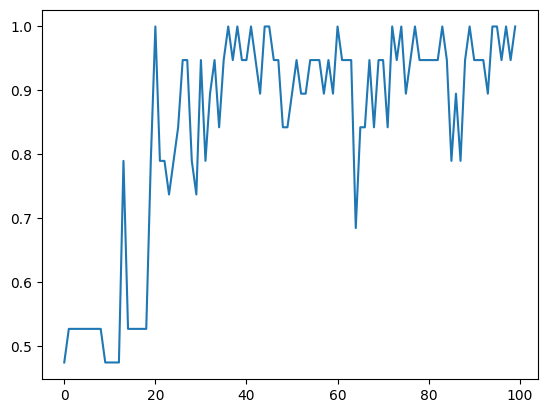

In [13]:
plt.plot(results.history['accuracy'])

<b> 13. Vi laddar in en testbild (En bild som inte finns i träningsdataset:en) för att se hur bra vår modell fungerar! Observera att i detta simpla exempel så måste X eller O täcka mer eller mindre hela bilden och bakgrunden bör (antagligen) vara vit för att det ska fungera. För att få modellen att hitta X eller O även om de är skrivna i mindre storlek och i olika bakgrunder så måste träningsdataset:en utökas.

In [14]:
import numpy as np
import keras.utils as image
test_image = '/content/compvis/test_image1.jpg'
test_image = image.load_img(test_image, target_size=(100,100)) #laddar testbilden och sätter storleken till samma som träningsbilderna
test_image = image.img_to_array(test_image)                    #konverterar till array-format

test_image = np.expand_dims(test_image, axis=0)
test_image = test_image/255                                    #Ändrar pixelvärden från 8-bitar (0-255) till värden mellan 0 och 1

<b> 14. Vi startar "predikteringen" dvs. Som svar får vi konfidensvärden som berättar hur stor sannolikhten är att bilden innehåller ett X och hur stor sannolikheten är att bilden innehåller ett O

In [15]:
prob = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [16]:
print(prob)

[[0.84596676 0.12440345]]


In [17]:
print("Sannolikheten att testbilden innehåller O: " + str(prob[0][0]))
print("Sannolikheten att testbilden innehåller X: " + str(prob[0][1]))

Sannolikheten att testbilden innehåller O: 0.84596676
Sannolikheten att testbilden innehåller X: 0.12440345
